# Simple Linear Regression from Scratch

- On considère le dataset `possum.csv` qui rassemble des données sur des opossums.

- Implémentez une **régression linaire** permettant de prédire la variable $Y$ `footlgth`en fonction de la variable $X$ `earconch`.

- On rappelle que le problème de minimisation et la solution associée de la régression linéaire sont donnés par:

\begin{eqnarray*}
\hat \beta_0, \hat \beta_1 & = & \underset{\beta_0, \beta_1}{\arg \min}~\mathrm{RSS} ( \beta_0, \beta_1 ) 
= \underset{\beta_0, \beta_1}{\arg \min} \sum_{i=1}^N \big( (\beta_0 + \beta_1 x_i) - y_i \big)^2 \\
\\
\hat \beta_0  = \bar y - \hat \beta_1 \bar x & ~~~~~\text{et}~~~~~ & \hat \beta_1  = \frac{\sum_{i=1}^N x_i (y_i - \bar y)}{\sum_{i=1}^N x_i (x_i - \bar x)} = \frac{\sum_{i=1}^N ( x_i - \bar x)(y_i - \bar y)}{\sum_{i=1}^N (x_i - \bar x)^2} = \frac{S_{xy}}{S_{xx}}  \\
\\
& \text{où} & \bar x = \frac{1}{N}\sum_{i=1}^N x_i ~~~\text{et}~~~ \bar y = \frac{1}{N}\sum_{i=1}^N y_i
\end{eqnarray*}

## Librairies

In [88]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

## Data

In [58]:
dataset = pd.read_csv("data/possum.csv")

In [59]:
dataset

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


## Dataset

In [64]:
X = dataset.earconch.values
y = dataset.footlgth.values

In [65]:
X, y

(array([54.5, 51.2, 51.9, 52.2, 53.2, 53.6, 52. , 53.9, 52.9, 53.4, 51.3,
        51. , 49.8, 53.7, 51.8, 51.4, 53.2, 55.4, 53.9, 52.4, 52.9, 52.1,
        53.3, 53.5, 51.6, 56.2, 50.8, 53. , 51.8, 50.8, 52.5, 52. , 51.8,
        53.1, 55.5, 52. , 52. , 49.5, 53.4, 51.4, 51.2, 49.4, 54. , 45.5,
        44.9, 45. , 47.2, 43.9, 44.3, 46. , 46. , 44.9, 46.8, 45.3, 46.4,
        44.5, 47. , 44.9, 41.3, 46.3, 45.1, 41.7, 44.2, 44.1, 43.1, 45.6,
        44.1, 42.8, 42.4, 44.7, 45.9, 45.6, 46.4, 42.9, 44.3, 43. , 44.8,
        41.7, 42.9, 43.3, 43.6, 43.5, 43.7, 46.8, 43.5, 46.2, 44.8, 48. ,
        46.8, 44.9, 45.1, 45.4, 47.7, 46. , 44.3, 43.8, 46.8, 48. , 45.4,
        45.9, 46. ]),
 array([74.5, 72.5, 75.4, 76.1, 71. , 73.2, 71.5, 72.7, 72.4, 70.9, 77.2,
        71.7, 71. , 74.3, 69.7, 73. , 73.2, 73.7, 73.4, 73.8, 77.9, 73.5,
        72.8, 75. , 72.3, 73.6, 70.3, 73.2, 74.9, 70.6, 68. , 74.8, 70.8,
        73.1, 71.2, 74.3, 71.2, 68.4, 68.7, 72.8, 62.7, 72. , 71.5, 66. ,
        66.9, 69

In [17]:
X = dataset.earconch.to_numpy()

## Linear regression (from scratch)

In [25]:
X

array([54.5, 51.2, 51.9, 52.2, 53.2, 53.6, 52. , 53.9, 52.9, 53.4, 51.3,
       51. , 49.8, 53.7, 51.8, 51.4, 53.2, 55.4, 53.9, 52.4, 52.9, 52.1,
       53.3, 53.5, 51.6, 56.2, 50.8, 53. , 51.8, 50.8, 52.5, 52. , 51.8,
       53.1, 55.5, 52. , 52. , 49.5, 53.4, 51.4, 40.3, 51.2, 49.4, 52.6,
       54. , 51.2, 45.5, 44.9, 45. , 47.2, 43.9, 44.3, 46. , 46. , 44.9,
       46.8, 45.3, 46.4, 44.5, 47. , 44.9, 41.3, 46.3, 45.1, 41.7, 44.2,
       44.1, 43.1, 45.6, 44.1, 42.8, 42.4, 44.7, 45.9, 45.6, 46.4, 42.9,
       44.3, 43. , 44.8, 41.7, 42.9, 43.3, 43.6, 43.5, 43.7, 46.8, 43.5,
       46.2, 44.8, 48. , 46.8, 44.9, 45.1, 45.4, 47.7, 46. , 44.3, 43.8,
       46.8, 48. , 45.4, 45.9, 46. ])

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=42)

In [67]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((80,), (21,), (80,), (21,))

## Linear regression (scikit-learn)

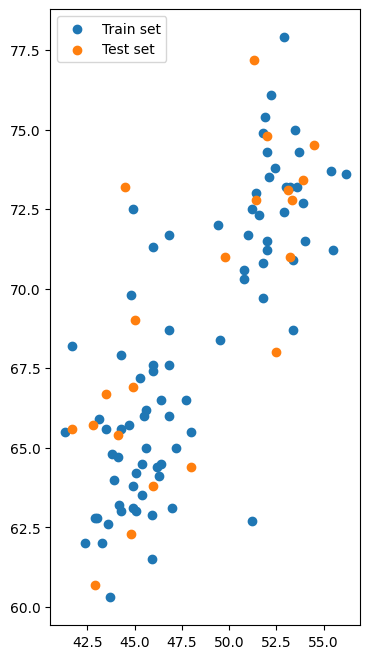

In [68]:
plt.figure(figsize=(4,8))

plt.scatter(X_train, y_train , label="Train set")
plt.scatter(X_test, y_test, label="Test set")
plt.legend()
plt.show()

In [69]:
x_bar = np.mean(X)
y_bar = np.mean(y)

In [62]:
dataset = dataset.dropna() # Drop NAN values 

In [70]:
x_bar, y_bar

(np.float64(48.13366336633663), np.float64(68.39801980198018))

In [71]:
dataset

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [72]:
X_train - x_bar

array([-3.23366337,  2.66633663,  5.86633663, -2.23366337,  3.26633663,
        3.06633663, -1.73366337,  5.26633663, -1.33366337,  2.86633663,
       -2.73366337, -5.03366337,  3.66633663, -1.33366337,  5.46633663,
       -4.23366337, -2.83366337,  3.86633663,  5.06633663, -4.63366337,
        7.36633663,  5.76633663, -2.63366337, -5.23366337,  4.86633663,
        4.26633663, -3.83366337,  8.06633663, -3.93366337, -2.13366337,
        5.56633663,  3.46633663,  4.06633663,  7.26633663,  5.26633663,
        4.76633663, -4.83366337,  3.86633663, -2.53366337,  3.86633663,
       -1.33366337, -1.13366337, -2.13366337, -1.73366337, -2.13366337,
       -5.73366337, -0.93366337, -3.43366337, -6.43366337, -2.73366337,
       -4.53366337,  1.26633663, -6.83366337, -3.83366337, -3.03366337,
       -3.23366337, -5.13366337,  3.66633663, -4.33366337, -1.83366337,
       -4.03366337, -1.93366337,  1.36633663,  2.66633663,  3.06633663,
       -1.33366337,  3.96633663,  3.76633663,  5.36633663, -0.13

In [73]:
y_train - y_bar

array([-4.59801980e+00,  1.90198020e+00,  3.10198020e+00, -6.89801980e+00,
        4.60198020e+00, -5.69801980e+00, -3.89801980e+00,  2.50198020e+00,
       -2.39801980e+00,  3.30198020e+00, -3.89801980e+00, -2.49801980e+00,
        6.50198020e+00,  3.30198020e+00,  4.80198020e+00, -4.39801980e+00,
       -1.19801980e+00,  5.90198020e+00,  4.80198020e+00, -2.79801980e+00,
        2.80198020e+00,  4.30198020e+00, -2.39801980e+00, -5.59801980e+00,
        4.80198020e+00,  5.40198020e+00, -2.79801980e+00,  5.20198020e+00,
       -5.19801980e+00, -9.98019802e-01,  5.90198020e+00,  3.90198020e+00,
        7.70198020e+00,  5.30198020e+00,  3.01980198e-01,  4.00198020e+00,
       -6.39801980e+00,  3.10198020e+00, -3.39801980e+00,  2.80198020e+00,
       -7.98019802e-01, -5.29801980e+00, -7.98019802e-01, -1.89801980e+00,
        2.90198020e+00, -6.39801980e+00, -3.39801980e+00, -2.69801980e+00,
       -1.98019802e-01, -4.89801980e+00, -5.79801980e+00,  3.60198020e+00,
       -2.89801980e+00, -

In [74]:
num = np.sum((X_train - x_bar) * (y_train-y_bar))
den = np.sum((X_train - x_bar)**2)

In [77]:
beta_hat_1 = num / den

In [80]:
beta_hat_0 = y_bar - beta_hat_1*x_bar

In [82]:
beta_hat_0, beta_hat_1

(np.float64(26.375539245796013), np.float64(0.8730372387482468))

In [84]:
def y_hat(x):
    return beta_hat_0 + beta_hat_1*x

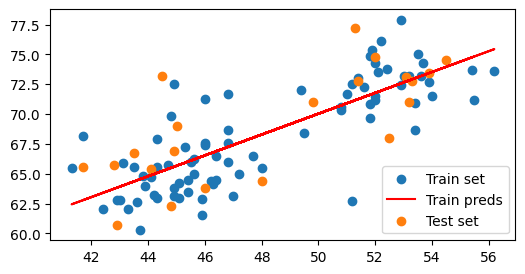

In [87]:
plt.figure(figsize=(6,3))

plt.scatter(X_train, y_train , label="Train set")
plt.plot(X_train, y_hat(X_train), label="Train preds",color="red")
plt.scatter(X_test, y_test, label="Test set")
plt.legend()
plt.show()

In [90]:
X = X.reshape(-1,1)
X

array([[54.5],
       [51.2],
       [51.9],
       [52.2],
       [53.2],
       [53.6],
       [52. ],
       [53.9],
       [52.9],
       [53.4],
       [51.3],
       [51. ],
       [49.8],
       [53.7],
       [51.8],
       [51.4],
       [53.2],
       [55.4],
       [53.9],
       [52.4],
       [52.9],
       [52.1],
       [53.3],
       [53.5],
       [51.6],
       [56.2],
       [50.8],
       [53. ],
       [51.8],
       [50.8],
       [52.5],
       [52. ],
       [51.8],
       [53.1],
       [55.5],
       [52. ],
       [52. ],
       [49.5],
       [53.4],
       [51.4],
       [51.2],
       [49.4],
       [54. ],
       [45.5],
       [44.9],
       [45. ],
       [47.2],
       [43.9],
       [44.3],
       [46. ],
       [46. ],
       [44.9],
       [46.8],
       [45.3],
       [46.4],
       [44.5],
       [47. ],
       [44.9],
       [41.3],
       [46.3],
       [45.1],
       [41.7],
       [44.2],
       [44.1],
       [43.1],
       [45.6],
       [44

In [91]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=42)

In [92]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((80, 1), (21, 1), (80,), (21,))

In [94]:
# 1. Instanciation du modèle 
model = LinearRegression()

In [97]:
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'positive': False,
 'tol': 1e-06}

In [98]:
# 2. Entraînement du modèle sur le train set
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [99]:
# 3. Evaluation du modèle sur le test set
y_test_preds = model.predict(X_test)

In [101]:
y_test, y_test_preds

(array([66.7, 73.2, 65.4, 65.7, 69. , 72.8, 72.8, 66.9, 77.2, 74.5, 73.4,
        68. , 64.4, 73.1, 65.6, 71. , 63.8, 60.7, 71. , 74.8, 62.3]),
 array([64.18102347, 65.05373083, 64.70464789, 63.57012831, 65.49008452,
        71.07541165, 72.73355565, 65.40281378, 70.98814092, 73.78080448,
        73.25718007, 72.03538975, 68.10820661, 72.55901417, 62.61015021,
        72.64628491, 66.36279188, 63.65739905, 69.67907987, 71.59903607,
        65.31554304]))

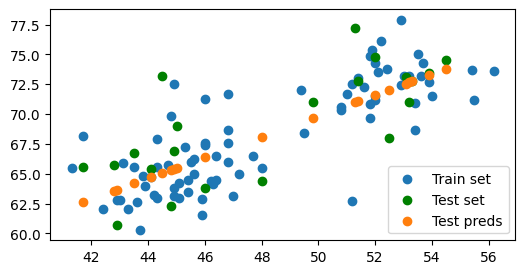

In [104]:
plt.figure(figsize=(6,3))

plt.scatter(X_train, y_train , label="Train set")
plt.scatter(X_test, y_test, label="Test set",color="green")
plt.scatter(X_test, y_test_preds, label="Test preds")
plt.legend()
plt.show()

In [105]:
RSS = np.sum((y_test_preds - y_test)**2)

In [106]:
RSS

np.float64(212.76723763279347)

In [107]:
dataset.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [125]:
X = dataset[['age' ,'hdlngth' , 'skullw', 'totlngth','taill', 'earconch', 'eye', 'chest','belly']].to_numpy()
y= dataset.footlgth.to_numpy()

In [126]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=42)

In [127]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((80, 9), (21, 9), (80,), (21,))

In [128]:
model2 = LinearRegression()

In [129]:
model2.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [130]:
model2.coef_ # c b0+b1*x (cf cours) + ....+ jusqu'à n 

array([-0.28729382,  0.05541475,  0.06229706,  0.33068319, -0.20271941,
        0.75652652,  0.09059697,  0.03502609,  0.13551714])

In [135]:
y_test_preds = model2.predict(X_test)
y_test, y_test_preds

(array([66.7, 73.2, 65.4, 65.7, 69. , 72.8, 72.8, 66.9, 77.2, 74.5, 73.4,
        68. , 64.4, 73.1, 65.6, 71. , 63.8, 60.7, 71. , 74.8, 62.3]),
 array([64.91402523, 69.80951678, 63.91345012, 64.12720695, 65.91951402,
        69.53920031, 73.20471643, 66.57060015, 69.84949886, 73.43731165,
        73.70709197, 73.24020076, 66.49312671, 71.19753052, 63.16939706,
        72.22260461, 65.64093947, 61.95307537, 70.41038983, 73.22279882,
        64.23413919]))

ValueError: x and y must be the same size

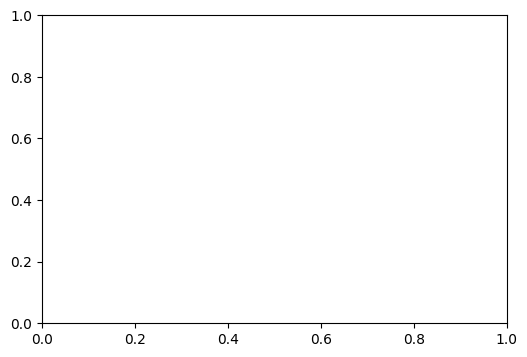

In [136]:
plt.figure(figsize=(6,4))

plt.scatter(X_train, y_train ,label="Train set")
plt.scatter(X_test, y_test, label="Test set",color="green")
plt.plot(X_train, y_hat(X_train) , label="Model de regression", color="red") #trop de x donc impossible à rpz
plt.scatter(X_test, y_test_preds, label="Test preds")
plt.legend()
plt.show()

In [137]:
RSS2 = np.sum((y_test_preds - y_test)**2)
RSS2

np.float64(149.41479840223548)